# Homework 2


## Description:

Columns represent (in order):
1) Company where they work
2) Job title
3) Office location
4) Total annual compensation (in $)
5) Base salary (in $)
6) Value of stock grants (in $)
7) Bonus payments (in $)
8) Years of relevant experience (in years)
9) Time with this company (in years)
10) Gender (self-reported)
11) Terminal Degree is Masters (1 = yes)
12) Terminal Degree is Bachelors (1 = yes)
13) Terminal Degree is Doctorate (1 = yes)
14) Terminal Degree is High School (1 = yes)
15) Terminal Degree is some college (1 = yes)
16) Self-identifies as Asian (1 = yes)
17) Self-identifies as White (1 = yes)
18) Self-identifies as Multi-Racial (1 = yes)
19) Self-identifies as Black (1 = yes)
20) Self-identifies as Hispanic (1 = yes)
21) Race as a qualitative variable
22) Education as a qualitative variable
23) Age (in years)
24) Height (in inches)
25) Zodiac sign (Tropical calendar, 1 = Aries, 12 = Pisces, with everything else in between)
26) SAT score
27) GPA
We/you will want to use most of these variables in prediction models.
This data is self-reported, so sometimes it will be missing if the person (for whatever reason) did not provide this information. For instance, the information on education (variables 11-15) is only meaningfully interpretable for any given row, if the corresponding value in variable 22 is not “NA”. NA indicates missing data. The same is true for variables 16 to 21.

## Loading the data:

In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv("techSalaries2017.csv")

## Data Cleaning/Engineering:

In [26]:
data.head(10)
data =data.drop(['basesalary','stockgrantvalue','bonus','Zodiac'],axis =1)
main_data = data

In [27]:
print(data.gender.value_counts())
print(data.Race.value_counts())
data['company'] = data['company'].str.upper()
data['title'] = data['title'].str.upper()
data['location'] = data['location'].str.upper()

# dropping rows with nan for company name, 
# I believe this predictor influences the predictions a lot
data = data[data['company'].notna()]




Male                               35702
Female                              6999
Other                                400
Title: Senior Software Engineer        1
Name: gender, dtype: int64
Asian          11772
White           8032
Hispanic        1129
Two Or More      804
Black            690
Name: Race, dtype: int64


In [28]:
data.sample(5)


,company,title,location,totalyearlycompensation,yearsofexperience,yearsatcompany,gender,Masters_Degree,Bachelors_Degree,Doctorate_Degree,...,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education,Age,Height,SAT,GPA
12066,VANGUARD,SOFTWARE ENGINEER,"MALVERN, PA",80000,1.0,1.0,Male,0,0,0,...,0,0,0,0,NaN,NaN,33,72.006,1111,3.01
27940,ROBINHOOD,SOFTWARE ENGINEER,"SAN FRANCISCO, CA",194000,0.0,0.0,NaN,0,0,0,...,0,0,0,0,NaN,NaN,38,65.164,1032,2.77
22031,AMAZON,SOFTWARE ENGINEER,"SAN FRANCISCO, CA",330000,9.0,4.0,NaN,0,0,0,...,0,0,0,0,NaN,NaN,41,69.191,1178,3.23
17973,BLOOMBERG,SOFTWARE ENGINEERING MANAGER,"NEW YORK, NY",357000,20.0,12.0,Male,1,0,0,...,0,0,0,0,NaN,Master's Degree,40,70.365,1151,3.07
37544,ZILLOW,SOFTWARE ENGINEERING MANAGER,"IRVINE, CA",260000,20.0,5.0,Female,0,0,0,...,1,0,0,0,White,NaN,59,66.673,1089,2.81


### Encoding all categorical variables:

In [29]:
le = LabelEncoder()
data['company']  = le.fit_transform(data['company'])
data['title']  = le.fit_transform(data['title'])
data['location']  = le.fit_transform(data['location'])


### Rescalling features

In [175]:
# normalizing the outcome variable
# Assuming the column to be normalized is stored in a NumPy array X
column_to_normalize = np.array(data['totalyearlycompensation'])  # Select the column you want to normalize
scaler = MinMaxScaler()          # Create a MinMaxScaler object
outcome = scaler.fit_transform(column_to_normalize.reshape(-1, 1))
data['totalyearlycompensation']=outcome

'''
I had previously used these 3 variables until I read the hints,
So I will abstain from them for the rest of the assignment. 
'''
# column_to_normalize = np.array(data['company'])  # Select the column you want to normalize
# data['company'] = scaler.fit_transform(column_to_normalize.reshape(-1, 1))

# column_to_normalize = np.array(data['title'])  # Select the column you want to normalize
# data['title'] = scaler.fit_transform(column_to_normalize.reshape(-1, 1))

# column_to_normalize = np.array(data['location'])  # Select the column you want to normalize
# data['location'] = scaler.fit_transform(column_to_normalize.reshape(-1, 1))

column_to_normalize = np.array(data['yearsofexperience'])  # Select the column you want to normalize
data['yearsofexperience'] = scaler.fit_transform(column_to_normalize.reshape(-1, 1))

column_to_normalize = np.array(data['yearsatcompany'])  # Select the column you want to normalize
data['yearsatcompany'] = scaler.fit_transform(column_to_normalize.reshape(-1, 1))
# column_to_normalize = np.array(data['gender'])  # Select the column you want to normalize
# data['gender'] = scaler.fit_transform(column_to_normalize.reshape(-1, 1))

predictors = data.drop(['totalyearlycompensation',"company",'Race_White','Race_Black','Race_Two_Or_More','Race_Hispanic','gender','Race_Asian','Race','Education', 'company','title','location'],axis =1)


In [32]:
data.head(5)

,company,title,location,totalyearlycompensation,yearsofexperience,yearsatcompany,gender,Masters_Degree,Bachelors_Degree,Doctorate_Degree,...,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education,Age,Height,SAT,GPA
0,722,8,767,0.023541,0.021739,0.021739,NaN,0,0,0,...,0,0,0,0,NaN,NaN,38,68.590,829,2.13
1,331,11,823,0.018109,0.072464,0.043478,NaN,0,0,0,...,0,0,0,0,NaN,NaN,34,68.059,993,2.77
2,47,8,859,0.060362,0.115942,0.000000,NaN,0,0,0,...,0,0,0,0,NaN,NaN,42,61.343,1200,3.26
3,71,12,909,0.072837,0.101449,0.072464,NaN,0,0,0,...,0,0,0,0,NaN,NaN,28,66.495,1170,3.07
4,640,11,610,0.029577,0.072464,0.043478,NaN,0,0,0,...,0,0,0,0,NaN,NaN,34,69.015,1115,2.91


## 1. Using multiple linear regression: What is the best predictor of total annual compensation, how much variance is explained by this predictor vs. the full multiple regression model?

### Answer: 
### On the preprocessing
-  The variables 5 to 7 sounds to be directly related to the compensation and therefore might be irrelevant to predicting the total compensation. Example: someone with high total compensation might be more likely to be in a position with higher base salary, stock grants and bonuses. 
- Columns like Height, age and zodiac were disregarded because either they make no sense on the relation with yearly compensation or because they might be correlated with other variable alredy being taken into account. Exemple: Years of experience may be very correlated with the age -the older you are more experience you have-. Later on you the correlations table you will that its true. 
- Other columns were revomed because they had already been turned into categorical variables such as education and race. 

### Checking for correlations
-  Columns that were found to be highly correlated were removed. 
-  The correlation table and heatmap were useful for picking a best predictor. The best predictor chosen by me was the `yearsofexperience` column because it has the largest correlation coeficient with our target column `totalyearlycompensation`.
- After looking for the least correlated variables for a second time,I also dropped columns associated with race. After that I saw a slightly increase on the the R^2 of both models. This was not documented but I observed it through a process of trial and error. 

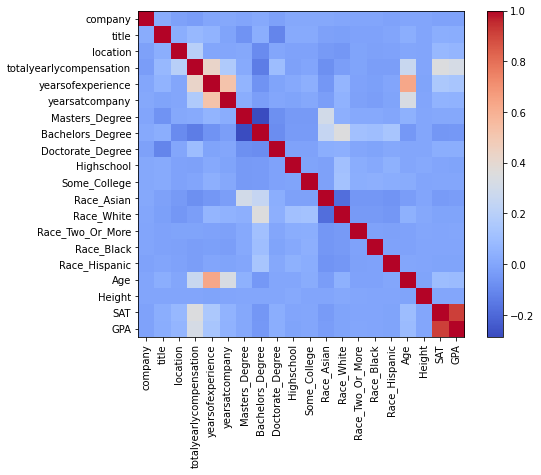

In [8]:
df = pd.DataFrame(data)
plt.figure(figsize=(8, 6))# get the correlation matrix
corr = df.corr()

# plot the correlation matrix using matplotlib
plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.show()

In [9]:
corr.totalyearlycompensation.sort_values()

Bachelors_Degree          -0.139833
Race_Asian                -0.080103
company                   -0.030145
Race_White                -0.027791
Race_Black                -0.026748
Race_Hispanic             -0.026024
Highschool                -0.014836
Race_Two_Or_More          -0.009629
Some_College              -0.003384
Height                    -0.001359
Masters_Degree             0.018288
title                      0.073268
Doctorate_Degree           0.097173
yearsatcompany             0.165774
location                   0.196606
Age                        0.264170
GPA                        0.319253
SAT                        0.349962
yearsofexperience          0.422848
totalyearlycompensation    1.000000
Name: totalyearlycompensation, dtype: float64

### Regressions
-  Now comparing the 2 regressions. By definition R-squared (R2) is a value between 0 and 1 that represents the proportion of the variation in the dependent variable explained by the independent variables in a regression model. By comparing the 2 models R2 we can observe that the simple regression model using our best predictor `yearsofexperience` has explained around 18.5% of the varience on the dependable variable `totalyearlycompensation`. While our multiple regression model with handpicked predictors, have achieved an R2 of about .33 which means that this model has explained around 33% of the varience on our dependable variable.
- One could argue that our multiple regression model is over fitting by having multiple predictors, but our RMSE has shown that not to be true.

Simple Linear Regression:

R-squared: 0.1846469238598084 RMSE: 0.0006212221234210354

* Edited after review

Multiple Linear Regression:

Containing predictors title, company, and location
R-squared: 0.3259203094713786 RMSE: 0.0005135851313488935

without predictors title, company, and location
R-squared: 0.2952100301269125 RMSE: 0.0005369834669945201

- On the edited part: 
    - It is plausible that even though the model with the 3 extra categorical predictors is better, it may also be true that it over fits to the training data.

In [35]:
xTrain, xTest, yTrain, yTest = train_test_split(np.array(data['yearsofexperience']).reshape(-1, 1), outcome.reshape(-1,1), test_size=0.5, random_state=0)

# create a regression object
model = LinearRegression()

# fit the model to your data
model.fit(xTrain, yTrain)

# predict the dependent variable
y_pred = model.predict(xTest)

# calculate R-squared
r_squared = r2_score(yTest, y_pred)
rmse = mean_squared_error(yTest,y_pred)

print("R-squared:", r_squared,"RMSE:",rmse )

R-squared: 0.1846469238598084 RMSE: 0.0006212221234210354


In [36]:
# create a regression object
xTrain, xTest, yTrain, yTest = train_test_split(predictors, outcome.reshape(-1,1), test_size=0.5, random_state=0)

model = LinearRegression()

# fit the model to your data
model.fit(xTrain, yTrain)

# predict the dependent variable
y_pred = model.predict(xTest)

# calculate R-squared
r_squared = r2_score(yTest, y_pred)
rmse = mean_squared_error(yTest,y_pred)

print("R-squared:", r_squared,"RMSE:",rmse )

R-squared: 0.2952100301269125 RMSE: 0.0005369834669945201



## 2. Using ridge regression to do the same as in 1): How does the model change or improve compared to OLS? What is the optimal lambda?

### Answer:

Report:
___________________________
Simple Linear Regression:

RMSE = 0.0006643937370673719 R^2 = 0.17520990973078954

Optimal lambda: -5.199999999999999

Multiplre Linear Regression:

Optimal lambda: -4.074999999999999

RMSE = 0.0005535932718914939 R^2= 0.3127595592468504
__________________________

Both models did change, but for the worst. I continued using the same random seed for the process of train split, so the models would be trained and the lambdas would be test on the same data as our original models on the question 1.

Still, both Ridge Regression models are worst by a margin of ~1%. Meaning that both regularized models explain about ~1% less then our un-regularized models.









### Multiple Ridge Regression

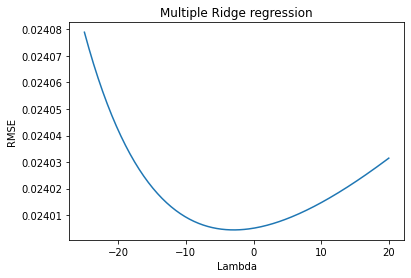

Optimal lambda: -2.9499999999999993


In [37]:

# Init parameters:
seed = 0
xTrain, xTest, yTrain, yTest = train_test_split(predictors, outcome.reshape(-1,1), test_size=0.2, random_state=seed)
lambdas = np.linspace(-25,20,201)
cont = np.empty([len(lambdas),2])*np.NaN # [lambda error]
for ii in range(len(lambdas)):
    ridgeModel = Ridge(alpha=lambdas[ii]).fit(xTrain, yTrain)
    cont[ii,0] = lambdas[ii]
    error = mean_squared_error(yTest,ridgeModel.predict(xTest),squared=False)
    cont[ii,1] = error

plt.plot(cont[:,0],cont[:,1])
plt.xlabel('Lambda')
plt.ylabel('RMSE')
plt.title('Multiple Ridge regression')
plt.show()
optimal_lambda_multiple = lambdas[np.argmax(cont[:,1]==np.min(cont[:,1]))]
print('Optimal lambda:',optimal_lambda_multiple)
# multiple Ridge regression



In [38]:
# multiple Ridge regression
ridgeModel = Ridge(alpha=optimal_lambda_multiple).fit(xTrain, yTrain)
error = mean_squared_error(yTest,ridgeModel.predict(xTest))
r_squared = r2_score(yTest,ridgeModel.predict(xTest))
print(error,r_squared)


0.0005762144715295082 0.28467720348324754


### Single Ridge Regression

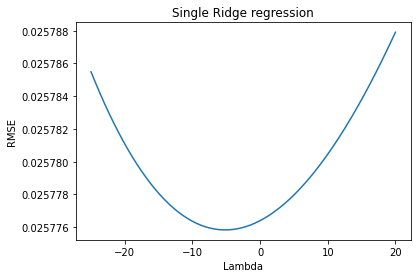

Optimal lambda: -5.199999999999999


In [40]:
# Init parameters:
xTrain, xTest, yTrain, yTest = train_test_split(np.array(data['yearsofexperience']).reshape(-1, 1), outcome.reshape(-1,1), test_size=0.2, random_state=seed)
lambdas = np.linspace(-25,20,201)
cont = np.empty([len(lambdas),2])*np.NaN # [lambda error]
for ii in range(len(lambdas)):
    ridgeModel = Ridge(alpha=lambdas[ii]).fit(xTrain, yTrain)
    cont[ii,0] = lambdas[ii]
    error = mean_squared_error(yTest,ridgeModel.predict(xTest),squared=False)
    cont[ii,1] = error

plt.plot(cont[:,0],cont[:,1])
plt.xlabel('Lambda')
plt.ylabel('RMSE')
plt.title('Single Ridge regression')
plt.show()
optimal_lambda_single = lambdas[np.argmax(cont[:,1]==np.min(cont[:,1]))]

print('Optimal lambda:',optimal_lambda_single)

In [41]:
# single Ridge regression
ridgeModel = Ridge(alpha=optimal_lambda_single).fit(xTrain, yTrain)
error = mean_squared_error(yTest,ridgeModel.predict(xTest),squared=True)
r_squared = r2_score(yTest,ridgeModel.predict(xTest))
print(error,r_squared)

0.0006643937370673719 0.17520990973078954



## 3. Using Lasso regression to do the same as in 1): How does the model change now? How many of the predictor betas are shrunk to exactly 0? What is the optimal lambda now?

### Answer:

Both models now are actually performing worse. Probably due to a bad seed for the random state of the train_test_split function. on the multiple regression 9 of our predictor's betas were shrunk.

For multiple regression:

Optimal lambda: 0.5500000000000007

For Simple Linear regression:

Optimal lambda: 0.13422818791946156



### Multiple Lasso Regression

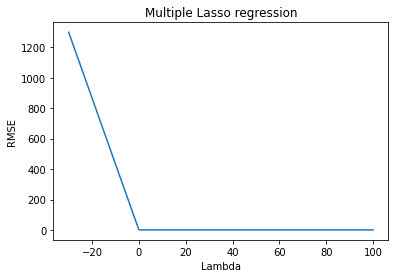

Optimal lambda: 0.5500000000000007


In [182]:
#%% 5. Now do the same thing--but with lasso regression
import warnings
warnings.filterwarnings('ignore') # Just to ignore warnings that might be thrown due to artifically formed data.

# Load libraries:
from sklearn.linear_model import Lasso

# Init parameters:
xTrain, xTest, yTrain, yTest = train_test_split(predictors, outcome.reshape(-1,1), test_size=0.2, random_state=0)
lambdas = np.linspace(-30,100,201)

cont = np.empty([len(lambdas),2])*np.NaN # [lambda error]

for ii in range(len(lambdas)):
    lassoModel = Lasso(alpha=lambdas[ii]).fit(xTrain, yTrain)
    cont[ii,0] = lambdas[ii]
    error = mean_squared_error(yTest,lassoModel.predict(xTest),squared=False)
    cont[ii,1] = error

plt.plot(cont[:,0],cont[:,1])
plt.xlabel('Lambda')
plt.ylabel('RMSE')
plt.title('Multiple Lasso regression')
plt.show()
optimal_lambda_multiple = lambdas[np.argmax(cont[:,1]==np.min(cont[:,1]))]
print('Optimal lambda:',lambdas[np.argmax(cont[:,1]==np.min(cont[:,1]))])


In [183]:

#multiple lasso
lassoModel = Lasso(alpha=optimal_lambda_multiple).fit(xTrain, yTrain)
error = mean_squared_error(yTest,lassoModel.predict(xTest),squared=False)
r_squared = r2_score( yTest,lassoModel.predict(xTest))
print(error,r_squared)
print(lassoModel.coef_)

0.4773686840218829 0.0884726320371435
[ 0.          0.          0.         -0.          0.         -0.
 -0.          0.0050059  -0.          0.00095711  0.        ]


### Single Lasso Regression

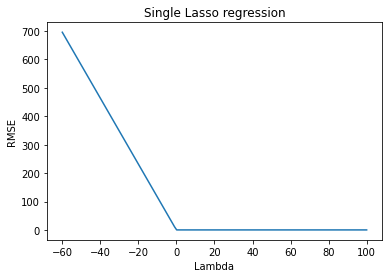

Optimal lambda: 0.13422818791946156


In [195]:
# Init parameters:
xTrain, xTest, yTrain, yTest = train_test_split(np.array(data['yearsofexperience']).reshape(-1, 1), outcome.reshape(-1,1), test_size=0.2, random_state=144)
lambdas = np.linspace(-60,100,150)


cont = np.empty([len(lambdas),2])*np.NaN # [lambda error]

for ii in range(len(lambdas)):
    lassoModel = Lasso(alpha=lambdas[ii]).fit(xTrain, yTrain)
    cont[ii,0] = lambdas[ii]
    error = mean_squared_error(yTest,lassoModel.predict(xTest),squared=False)
    
    cont[ii,1] = error

plt.plot(cont[:,0],cont[:,1])
plt.xlabel('Lambda')
plt.ylabel('RMSE')
plt.title('Single Lasso regression')
plt.show()
optimal_lambda_single = lambdas[np.argmax(cont[:,1]==np.min(cont[:,1]))]

print('Optimal lambda:',lambdas[np.argmax(cont[:,1]==np.min(cont[:,1]))])

In [196]:
#single lasso
lassoModel = Lasso(alpha=optimal_lambda_single).fit(xTrain, yTrain)
error = mean_squared_error(yTest,lassoModel.predict(xTest),squared=False)
r_squared = r2_score(yTest,lassoModel.predict(xTest))
print(error,r_squared)
print(lassoModel.coef_)

0.5000023242133684 -0.00010727440064273175
[0.]


## 4. There is controversy as to the existence of a male/female gender pay gap in tech job compensation. Build a logistic regression model (with gender as the outcome variable) to see if there is an appreciable beta associated with total annual compensation with and without controlling for other factors.

### Organizing dataset for model and dealing with missing data

Our dataset has both many missing data for the gender column and extremely inbalanced classes. So in this step I am fixing this issue, to input data in the regression that is the least biased as possible.
-  I am only using columns that contains an assigned valu for gender 
- I am randomly sampling all the records with `MALE` as assigned value for column gender. On this random sample I am using only 6999 records, because it matches the amount available for `FEMALE` records. This way I am avoiding biase towards a specific class with an imbalanced dataset. 

In [101]:
data.gender = data.gender.str.upper()
gender_logit_regression_data = data[(data.gender=='MALE') |(data.gender=='FEMALE')]


In [102]:
# big difference in the value counts for this category 
gender_logit_regression_data.gender.value_counts()

MALE      35698
FEMALE     6999
Name: gender, dtype: int64

In [116]:
# sampling the same amount of records as for female randomly 
male_df = gender_logit_regression_data[gender_logit_regression_data.gender == 'MALE'].sample(6000)

female_df = gender_logit_regression_data[gender_logit_regression_data.gender == 'FEMALE'].sample(6000)

gender_data = pd.concat([male_df, female_df])
gender_data['gender']  = le.fit_transform(gender_data['gender'])

## Now Male lable stands for 1 and Female lable stands for 0 
gender_data


,company,title,location,totalyearlycompensation,yearsofexperience,yearsatcompany,gender,Masters_Degree,Bachelors_Degree,Doctorate_Degree,...,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education,Age,Height,SAT,GPA
10765,71,11,909,0.036821,0.144928,0.000000,1,0,0,0,...,0,0,0,0,NaN,NaN,41,67.151,1089,3.03
56603,143,11,58,0.020523,0.173913,0.014493,1,1,0,0,...,0,0,0,0,Asian,Master's Degree,32,66.442,1098,2.83
56640,640,11,257,0.022133,0.057971,0.028986,1,0,0,0,...,1,0,0,0,White,NaN,31,69.000,1088,2.73
15891,365,8,562,0.048290,0.028986,0.000000,1,1,0,0,...,0,0,0,0,NaN,Master's Degree,37,67.546,975,2.86
43268,829,11,824,0.028370,0.072464,0.000000,1,0,0,0,...,0,0,0,0,Asian,NaN,33,71.486,1031,2.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,640,11,765,0.033602,0.086957,0.065217,0,0,0,0,...,0,0,0,0,NaN,NaN,36,70.494,979,2.55
49636,47,9,625,0.017304,0.086957,0.014493,0,0,1,0,...,1,0,0,0,White,Bachelor's Degree,37,71.505,1074,3.03
27359,47,7,823,0.035211,0.028986,0.014493,0,0,1,0,...,0,0,0,0,NaN,Bachelor's Degree,32,59.407,1169,3.12
33867,102,1,183,0.018511,0.072464,0.043478,0,0,1,0,...,1,0,0,0,White,Bachelor's Degree,43,69.323,1163,3.27


### Correlation

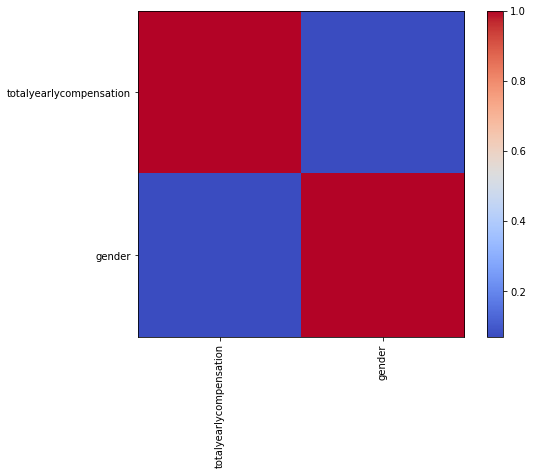

,totalyearlycompensation,gender
totalyearlycompensation,1.000000,0.069288
gender,0.069288,1.000000


In [143]:
df = pd.DataFrame(gender_data[['totalyearlycompensation','gender']])
plt.figure(figsize=(8, 6))# get the correlation matrix
corr = df.corr()

# plot the correlation matrix using matplotlib
plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.show()
corr

### The Simple logistical regression


In [157]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(np.array(gender_data['totalyearlycompensation']).reshape(-1, 1), np.array(gender_data['gender']).reshape(-1, 1), test_size=0.2,random_state = 1)

# Define your logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Test the model on the testing data
# predict the dependent variable
y_pred = model.predict(X_test)

# calculate R-squared
r_squared = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test,y_pred)
acc = model.score(X_test, y_test)
cm = confusion_matrix(y_test,y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

print("Accuracy: {:.2f}%".format(acc  * 100))
print(cm)
mcc
single_coef = model.coef_[0][0]
print(model.coef_)

Accuracy: 52.33%
[[822 341]
 [803 434]]
[[3.60674926]]


### The multiple logisticat regression

In [158]:
# Split the data into training and testing sets
predictors_columns = ['yearsofexperience','title','location','totalyearlycompensation','Masters_Degree','Bachelors_Degree','yearsofexperience','SAT']
predictors = gender_data.drop(["company",'title','location','Race_White','Race_Black','Race_Two_Or_More','Race_Hispanic','gender','Race_Asian','Race','Education','Height','Age'],axis =1)


X_train, X_test, y_train, y_test = train_test_split(predictors, np.array(gender_data['gender']).reshape(-1, 1), test_size=0.2,random_state =1)

# Define your logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Test the model on the testing data
r_squared = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test,y_pred)
acc = model.score(X_test, y_test)
cm = confusion_matrix(y_test,y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

print("Accuracy: {:.2f}%".format(acc * 100))
print(cm)
mcc
print(model.coef_)
multiple_coef =model.coef_[0][0]

Accuracy: 54.00%
[[761 402]
 [702 535]]
[[ 0.0632371   0.32130456  0.07683531 -0.33876056 -0.43016258  0.04844022
   0.09564622  0.05274939  0.00051555 -0.09303457]]


In [161]:
print('change in coeficient',single_coef/multiple_coef)

change in coeficient 57.035338228713464


### *Interpreting results:* 

On the first linear regression where we use the `totalyearlycompensation` alone as a predictor for gender. Our model gives us a coeficient of 3.60674926 meaning that for every change on our predictor, the dependable variable will change by a factor of 3.6. This high number must be due to the fact that `totalyearlycompensation` is our only predictor and its doing all of the heavy lifting for the model. We use a correlation, shown on the correlation section of this question, that this variable is very weakly correleated with our target variables. 

Subsequentially we used a Logistical regression with multiple predictors [`totalyearlycompensatio`, `yearsofexperience`, `yearsatcompany`, `Masters_Degree`, `Bachelors_Degree`,`Doctorate_Degree`,`Highschool`,`Some_College`,`SAT`, `GPA`]. 

By comparing the coefficients related to `totalyearlycompensation` we see a decrease by a factor of 57x. Meaning that its 57 times lower than the one on the single logictical regression. While, now our best coeficient is related to the variable `yearsofexperience`. 

My interpretation is that `yearsofexperience` might be related to fact that one of the class may have a longer years of experience than the other class. Therefore it works as a better predictor for gender. 

Futhermore, we can see that the `totalyearlycompensation` alone cant be used as a single predictor for gender, because once we added extra predictors, our model had a slightly improve. 



## 5. Build a logistic regression model to see if you can predict high and low pay from years of relevant experience, age, height, SAT score and GPA, respectively.


### Creating cutoff and setting values in the data frame

The cutoff is set by the median value of the totalyearlycompensation column. So any value greater than that is beign assigned the class 1 and anythin below is being assigned the class 0. 

In [202]:
pay_Logit_data = data

def check_cutoff(value):
    if value > pay_Logit_data.totalyearlycompensation.median():
        return 1
    else:
        return 0
    
pay_Logit_data['totalyearlycompensation'] = pay_Logit_data['totalyearlycompensation'].apply(check_cutoff)

pay_Logit_data

,company,title,location,totalyearlycompensation,yearsofexperience,yearsatcompany,gender,Masters_Degree,Bachelors_Degree,Doctorate_Degree,...,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education,Age,Height,SAT,GPA
0,722,8,767,0,0.021739,0.021739,NaN,0,0,0,...,0,0,0,0,NaN,NaN,38,68.590,829,2.13
1,331,11,823,0,0.072464,0.043478,NaN,0,0,0,...,0,0,0,0,NaN,NaN,34,68.059,993,2.77
2,47,8,859,1,0.115942,0.000000,NaN,0,0,0,...,0,0,0,0,NaN,NaN,42,61.343,1200,3.26
3,71,12,909,1,0.101449,0.072464,NaN,0,0,0,...,0,0,0,0,NaN,NaN,28,66.495,1170,3.07
4,640,11,610,0,0.072464,0.043478,NaN,0,0,0,...,0,0,0,0,NaN,NaN,34,69.015,1115,2.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,437,11,859,1,0.144928,0.014493,NaN,0,0,0,...,0,0,0,0,NaN,NaN,52,64.792,1064,2.76
62638,640,11,765,1,0.028986,0.028986,NaN,0,0,0,...,0,0,0,0,NaN,NaN,21,69.483,1160,3.27
62639,661,11,859,1,0.202899,0.173913,NaN,0,0,0,...,0,0,0,0,NaN,NaN,43,62.331,1014,2.78
62640,832,11,823,1,0.115942,0.057971,NaN,0,0,0,...,0,0,0,0,NaN,NaN,48,70.357,1109,3.04


### The logistical regression

By observing the coeficients we can see that as expected from the correlation table in the beginning of the assignment, `yearsofexperience` is one of the most correlated predictors with `totalyearlycompensation`. Therefore it has the heighest coefficient. While it is interesting to note that 'Age','Height','GPA' coefficients are negative. Meaning that these predictors have an inverse relation with our target variable.

We can see that with an MCC of 0.38, it is safe to say that our model with be able to predict unseen data , most of time, and these predictions will be correct. 

Accuracy: 69.07%

Coefficients:
[[ 1.02798357e+01 -2.08954559e-03 -2.80691883e-02  3.74386274e-03
  -1.75117927e-02]]

Confusion Matrix:
  [[4616 1661]
 [2214 4037]] 
 
 MCC:
 0.3827647361621342

In [204]:
predictors_columns = ['yearsofexperience','Age','Height','SAT','GPA']


X_train, X_test, y_train, y_test = train_test_split(pay_Logit_data[predictors_columns], np.array(pay_Logit_data['totalyearlycompensation']).reshape(-1, 1), test_size=0.2,random_state = 0)

# Define your logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Test the model on the testing data
acc = model.score(X_test, y_test)
cm = confusion_matrix(y_test,y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
print("Accuracy: {:.2f}%".format(acc * 100))
print(model.coef_)
print(cm,mcc)

Accuracy: 69.07%
[[ 1.02798357e+01 -2.08954559e-03 -2.80691883e-02  3.74386274e-03
  -1.75117927e-02]]
[[4616 1661]
 [2214 4037]] 0.3827647361621342


## Extra credit:
## a) Is salary, height or age normally distributed? Does this surprise you? Why or why not?
## b) Tell us something interesting about this dataset that is not already covered by the questions above and that is not obvious.

## Extra Credit A

Among all of the 3 variables, height is the only that is normally distributed, as it is a canonical example of the normal distribution given in textbooks. While salary and age are slightly skewed to the left. It is expected that on the case of salary, we will find a large frequency of salaries slightly below the mean, and the higher the salary gets, the lower the frequency. It is expected that age is also skewed in this case, because our data set is about work force. It is expected that the age group of 25 - 40 account for a larger percentage of the worke force. Therefore, there were no surprise given the assumptinos listed above.  


<AxesSubplot:ylabel='Frequency'>

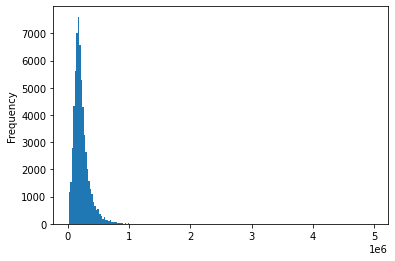

In [ ]:
main_data.totalyearlycompensation.plot.hist(bins=200)

<AxesSubplot:ylabel='Frequency'>

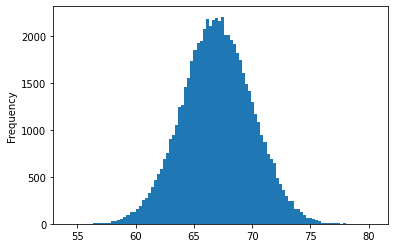

In [ ]:
main_data.Height.plot.hist(bins=100)

<AxesSubplot:ylabel='Frequency'>

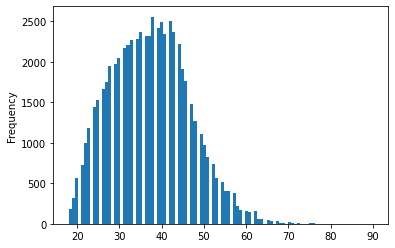

In [ ]:
main_data.Age.plot.hist(bins=100)

## Extra Credit B

Something interesting is that if we turn the Title, location and company columns(that are categorical variables) into numeric values, we probably could get a decent model for predicting high and low salaries. 